This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to Keras and TensorFlow

## What's TensorFlow?

## What's Keras?

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [2]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [3]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


**Random tensors**

In [5]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 0.31030256]
 [-0.05496018]
 [ 0.04742486]], shape=(3, 1), dtype=float32)


In [7]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

tf.Tensor(
[[0.7108418 ]
 [0.5540509 ]
 [0.30334806]], shape=(3, 1), dtype=float32)


**NumPy arrays are assignable**

In [8]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

**Creating a TensorFlow variable**

In [9]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.72396046],
       [-0.4731982 ],
       [ 1.0561259 ]], dtype=float32)>


**Assigning a value to a TensorFlow variable**

In [10]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

**Assigning a value to a subset of a TensorFlow variable**

In [11]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

**Using `assign_add`**

In [12]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [13]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

#### A second look at the GradientTape API

**Using the `GradientTape`**

In [14]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

**Using `GradientTape` with constant tensor inputs**

In [15]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

**Using nested gradient tapes to compute second-order gradients**

In [16]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [17]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [18]:
num_samples_per_class = 500
negative_samples = np.random.multivariate_normal(
    mean=[2, 3],
    cov=[[1, 0.2],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 1],
    cov=[[1,0.5],[0.5, 1]],
    size=num_samples_per_class)

<ipython-input-18-e12ed731185e>:2: RuntimeWarning: covariance is not positive-semidefinite.
  negative_samples = np.random.multivariate_normal(


**Stacking the two classes into an array with shape (2000, 2)**

In [19]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [20]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

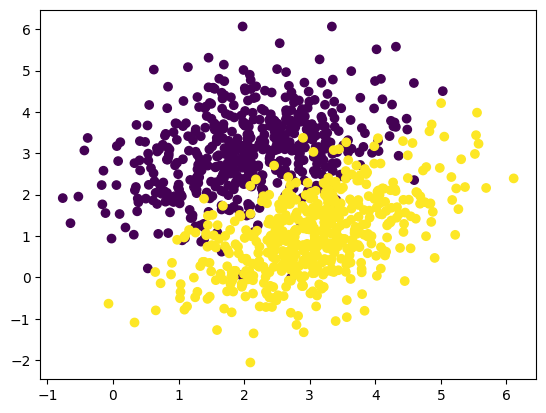

In [21]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [22]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [23]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [24]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [25]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [26]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 3.3230
Loss at step 1: 8.3576
Loss at step 2: 21.3485
Loss at step 3: 54.8598
Loss at step 4: 141.2981
Loss at step 5: 364.2491
Loss at step 6: 939.3031
Loss at step 7: 2422.5256
Loss at step 8: 6248.1587
Loss at step 9: 16115.5029
Loss at step 10: 41566.0430
Loss at step 11: 107209.8750
Loss at step 12: 276523.0312
Loss at step 13: 713227.5625
Loss at step 14: 1839606.6250
Loss at step 15: 4744842.0000
Loss at step 16: 12238230.0000
Loss at step 17: 31565702.0000
Loss at step 18: 81416456.0000
Loss at step 19: 209995040.0000
Loss at step 20: 541633920.0000
Loss at step 21: 1397020032.0000
Loss at step 22: 3603291136.0000
Loss at step 23: 9293860864.0000
Loss at step 24: 23971375104.0000
Loss at step 25: 61828644864.0000
Loss at step 26: 159472746496.0000
Loss at step 27: 411323170816.0000
Loss at step 28: 1060913283072.0000
Loss at step 29: 2736382017536.0000
Loss at step 30: 7057866489856.0000
Loss at step 31: 18204145483776.0000
Loss at step 32: 46953404563456.0000
L

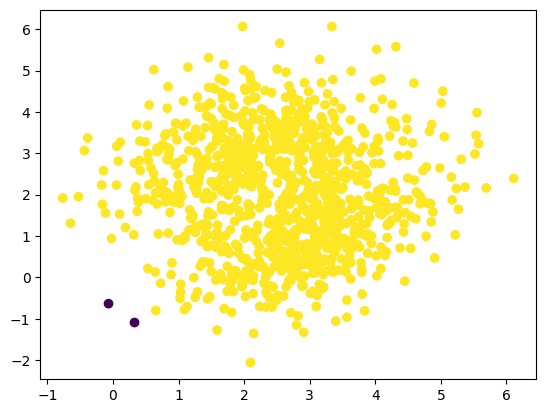

In [27]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

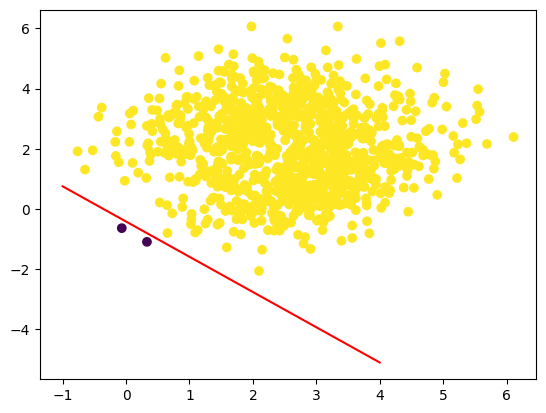

In [28]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [30]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [31]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

(2, 32)


#### Automatic shape inference: Building layers on the fly

In [32]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [33]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [34]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [35]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [36]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [37]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

Epoch 1/5
8/8 [==============================] - 2s 4ms/step - loss: 2.1697 - binary_accuracy: 0.5010
Epoch 2/5
8/8 [==============================] - 0s 3ms/step - loss: 1.9846 - binary_accuracy: 0.5010
Epoch 3/5
8/8 [==============================] - 0s 3ms/step - loss: 1.8478 - binary_accuracy: 0.5010
Epoch 4/5
8/8 [==============================] - 0s 3ms/step - loss: 1.7250 - binary_accuracy: 0.5010
Epoch 5/5
8/8 [==============================] - 0s 4ms/step - loss: 1.6102 - binary_accuracy: 0.5010


In [38]:
history.history

{'loss': [2.1696982383728027,
  1.9846493005752563,
  1.8477858304977417,
  1.724980354309082,
  1.6102315187454224],
 'binary_accuracy': [0.5009999871253967,
  0.5009999871253967,
  0.5009999871253967,
  0.5009999871253967,
  0.5009999871253967]}

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [44]:
from tensorflow import keras

model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
44/44 [==============================] - 1s 10ms/step - loss: 0.2523 - binary_accuracy: 0.7829 - val_loss: 0.3019 - val_binary_accuracy: 0.6833
Epoch 2/5
44/44 [==============================] - 0s 6ms/step - loss: 0.1722 - binary_accuracy: 0.8200 - val_loss: 0.0948 - val_binary_accuracy: 0.9067
Epoch 3/5
44/44 [==============================] - 0s 6ms/step - loss: 0.1643 - binary_accuracy: 0.8200 - val_loss: 0.0938 - val_binary_accuracy: 0.9033
Epoch 4/5
44/44 [==============================] - 0s 5ms/step - loss: 0.1535 - binary_accuracy: 0.8514 - val_loss: 0.3637 - val_binary_accuracy: 0.5667
Epoch 5/5
44/44 [==============================] - 0s 6ms/step - loss: 0.1898 - binary_accuracy: 0.8214 - val_loss: 0.0902 - val_binary_accuracy: 0.9033


In [48]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.01),

loss=keras.losses.MeanSquaredError(),
metrics=[keras.metrics.BinaryAccuracy()])
indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]
num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
training_inputs,
training_targets,
epochs=5,
batch_size=16,
validation_data=(val_inputs, val_targets)
)

Epoch 1/5
44/44 [==============================] - 1s 6ms/step - loss: 2.3471 - binary_accuracy: 0.9043 - val_loss: 1.2691 - val_binary_accuracy: 0.9100
Epoch 2/5
44/44 [==============================] - 0s 5ms/step - loss: 0.9059 - binary_accuracy: 0.9057 - val_loss: 0.4188 - val_binary_accuracy: 0.8967
Epoch 3/5
44/44 [==============================] - 0s 4ms/step - loss: 0.2843 - binary_accuracy: 0.8943 - val_loss: 0.1382 - val_binary_accuracy: 0.8933
Epoch 4/5
44/44 [==============================] - 0s 4ms/step - loss: 0.1273 - binary_accuracy: 0.8714 - val_loss: 0.1003 - val_binary_accuracy: 0.8967
Epoch 5/5
44/44 [==============================] - 0s 4ms/step - loss: 0.1003 - binary_accuracy: 0.8971 - val_loss: 0.0901 - val_binary_accuracy: 0.9033


### Inference: Using a model after training

In [ ]:
predictions = model.model(val_inputs)
print(predictions[:10])

## Summary